In [2]:
!pip install duckdb


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
parquet_file= r'C:\Users\31syl\Desktop\duckdb\0000 (1).parquet'
df= pd.read_parquet(parquet_file)

In [5]:
df= df.drop("Unnamed: 0", axis="columns")

In [6]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
df.shape

(114000, 20)

In [8]:
df['track_genre'].nunique()

114

#checking null values

In [9]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [10]:
df.dropna(subset=["artists","album_name","track_name"],inplace=True)

In [11]:
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

#finding info of each column

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

In [13]:
smallest_playlist=df.sort_values('duration_ms',ascending=True).head(10)
smallest_playlist

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
59310,6hsyfegVY5yklJneM40mWi,Leila Bela,Angra Manyu,The Exorsism Begins...,0,8586,False,0.000,0.0400,8,-29.714,0,0.0000,0.928,0.9560,0.115,0.000,0.000,0,iranian
59812,38Ogh3rsHba83kXx13gbKs,Leila Bela,Angra Manyu,V-4,0,13386,False,0.000,0.2240,11,-22.196,1,0.0000,0.970,0.0000,0.907,0.000,0.000,0,iranian
59775,1HVjSh7scH1PaPiLjy2LEu,Leila Bela;Leila's Opera Class,Angra Manyu,Screams for a Finale! (feat. Leila's Opera Class),0,15800,False,0.251,0.5080,5,-10.564,0,0.3160,0.969,0.9990,0.952,0.000,184.051,3,iranian
16856,5YKCM3jbJ8lqUXUwfU7KwZ,Wolfgang Amadeus Mozart;Ingrid Haebler,Mozart: The Complete Piano Sonatas,"Andante in C Major, K. 1a",0,17453,False,0.467,0.0301,2,-28.518,0,0.0428,0.995,0.9000,0.124,0.000,84.375,4,classical
16288,1T5QvLF9lO4HO3OZQbaX9p,Robert Schumann;Pavel Nersessian,"Schumann, Poulenc & Others: Piano Works (Live ...","Carnaval, Op. 9: No. 20, Pause (Live in Japan,...",0,17826,False,0.372,0.2780,8,-16.882,1,0.0370,0.985,0.9210,0.164,0.912,89.032,1,classical
39233,1T5QvLF9lO4HO3OZQbaX9p,Robert Schumann;Pavel Nersessian,"Schumann, Poulenc & Others: Piano Works (Live ...","Carnaval, Op. 9: No. 20, Pause (Live in Japan,...",0,17826,False,0.372,0.2780,8,-16.882,1,0.0370,0.985,0.9210,0.164,0.912,89.032,1,german
59306,3qSaeaXmtOuzkqe7DKgoiM,Leila Bela,Angra Manyu,V-7,0,21120,False,0.229,0.0577,8,-27.960,0,0.1960,0.626,0.9310,0.108,0.253,172.897,4,iranian
59609,1oVrTBrCsM2eTE1G50yxY9,Leila Bela,Angra Manyu,Shatter,0,21240,False,0.424,0.8690,9,-8.168,0,0.0728,0.707,0.0893,0.117,0.000,135.107,4,iranian
11398,1egJZfc8JBT2blFQ4clPKe,Benjamin Britten;Steven Isserlis,October Classical Playlist,"Cello Suite No. 3, Op. 87: IX. Passacaglia (Ex...",0,22266,False,0.335,0.0593,11,-26.365,0,0.0430,0.992,0.8690,0.116,0.195,77.266,5,british
39236,5viwzFJxwRE1OEUR7G6hiD,Robert Schumann;Pavel Nersessian,"Schumann, Poulenc & Others: Piano Works (Live ...","Carnaval, Op. 9: No. 13, Estrella (Live in Jap...",0,23506,False,0.379,0.2370,5,-18.265,1,0.0470,0.993,0.8870,0.144,0.477,116.093,4,german


In [14]:
most_pop= df.sort_values('popularity', ascending= False).head(10)
most_pop

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton
81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop
68303,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,latino
20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,dance
88410,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggae
30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,edm
67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,latin


In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,113999.0,33.238827,22.304959,0.000,17.0000,35.000000,50.0000,100.000
duration_ms,113999.0,228031.153387,107296.057716,8586.000,174066.0000,212906.000000,261506.0000,5237295.000
danceability,113999.0,0.566801,0.173543,0.000,0.4560,0.580000,0.6950,0.985
energy,113999.0,0.641383,0.251530,0.000,0.4720,0.685000,0.8540,1.000
key,113999.0,5.309126,3.559999,0.000,2.0000,5.000000,8.0000,11.000
loudness,113999.0,-8.258950,5.029357,-49.531,-10.0130,-7.004000,-5.0030,4.532
mode,113999.0,0.637558,0.480708,0.000,0.0000,1.000000,1.0000,1.000
speechiness,113999.0,0.084652,0.105733,0.000,0.0359,0.048900,0.0845,0.965
acousticness,113999.0,0.314907,0.332522,0.000,0.0169,0.169000,0.5975,0.996
instrumentalness,113999.0,0.156051,0.309556,0.000,0.0000,0.000042,0.0490,1.000


In [16]:
df["duration"]=df["duration_ms"].apply(lambda x: round(x/1000))
df.drop("duration_ms",inplace=True, axis=1)

In [17]:
df.head(2)

,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic,231
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic,150


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'speechiness'),
 Text(5.5, 0, 'acousticness'),
 Text(6.5, 0, 'instrumentalness'),
 Text(7.5, 0, 'liveness'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'time_signature'),
 Text(11.5, 0, 'duration')]

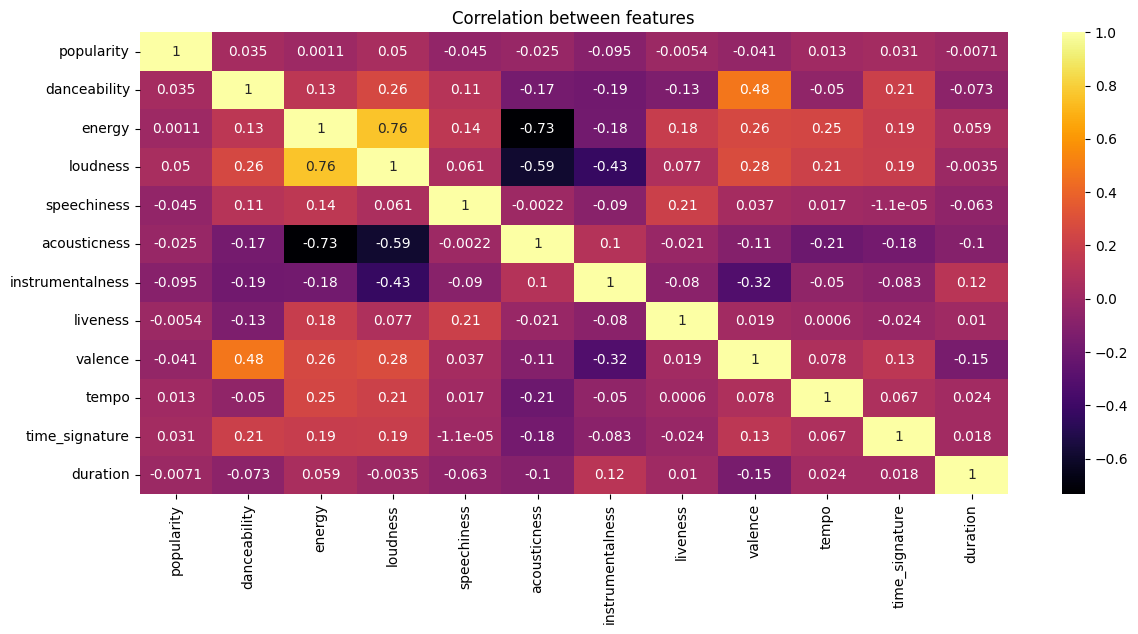

In [18]:
plt.figure(figsize=(14,6))
heatmap=df[['popularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','duration']].corr(method='pearson')
heatmap_graph=sns.heatmap(heatmap, annot=True, cmap="inferno")
heatmap_graph.set_title("Correlation between features")
heatmap_graph.set_xticklabels(heatmap_graph.get_xticklabels(),rotation=90)

[Text(0.5, 1.0, 'Loudness vs Energy')]

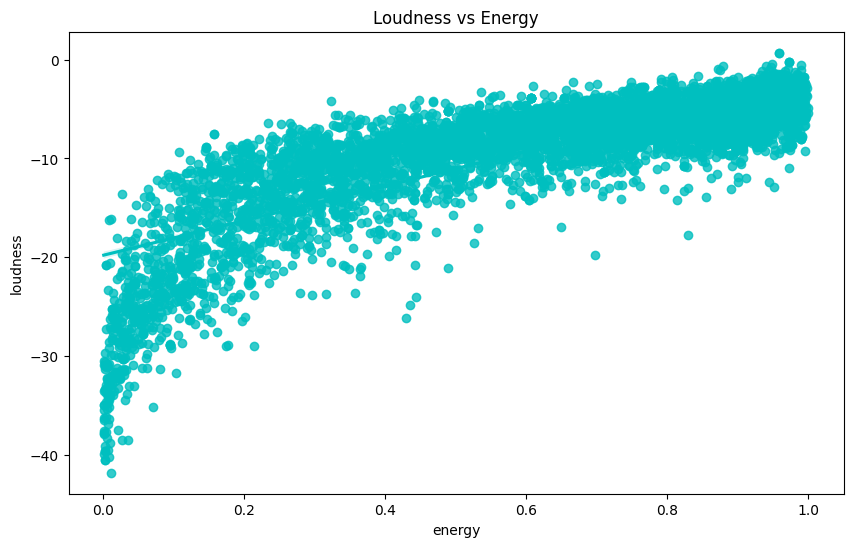

In [19]:
sample_df=df.head(6500)
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df, y='loudness', x='energy', color='c').set(title='Loudness vs Energy')

[Text(0.5, 1.0, 'Popularity vs Acousticness')]

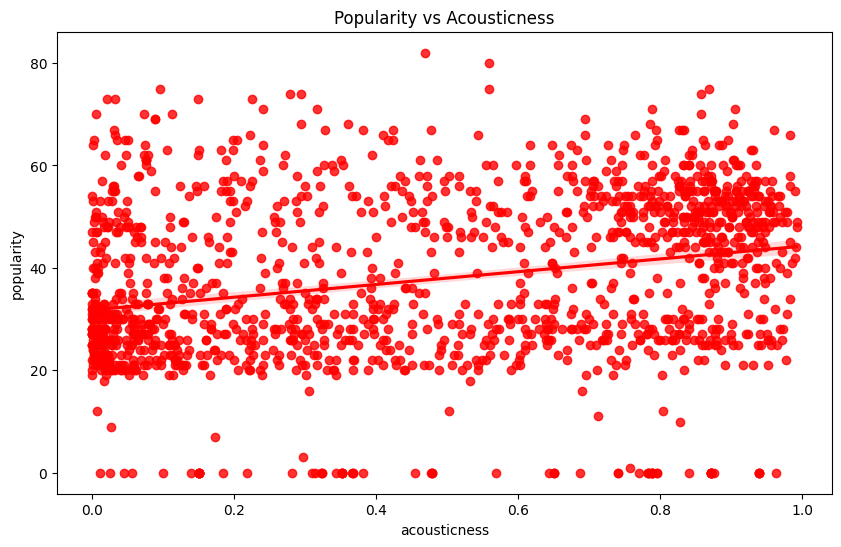

In [20]:
sample_df2=df.head(1500)
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df2, y='popularity', x='acousticness', color='r').set(title='Popularity vs Acousticness')

Text(0, 0.5, 'Genre')

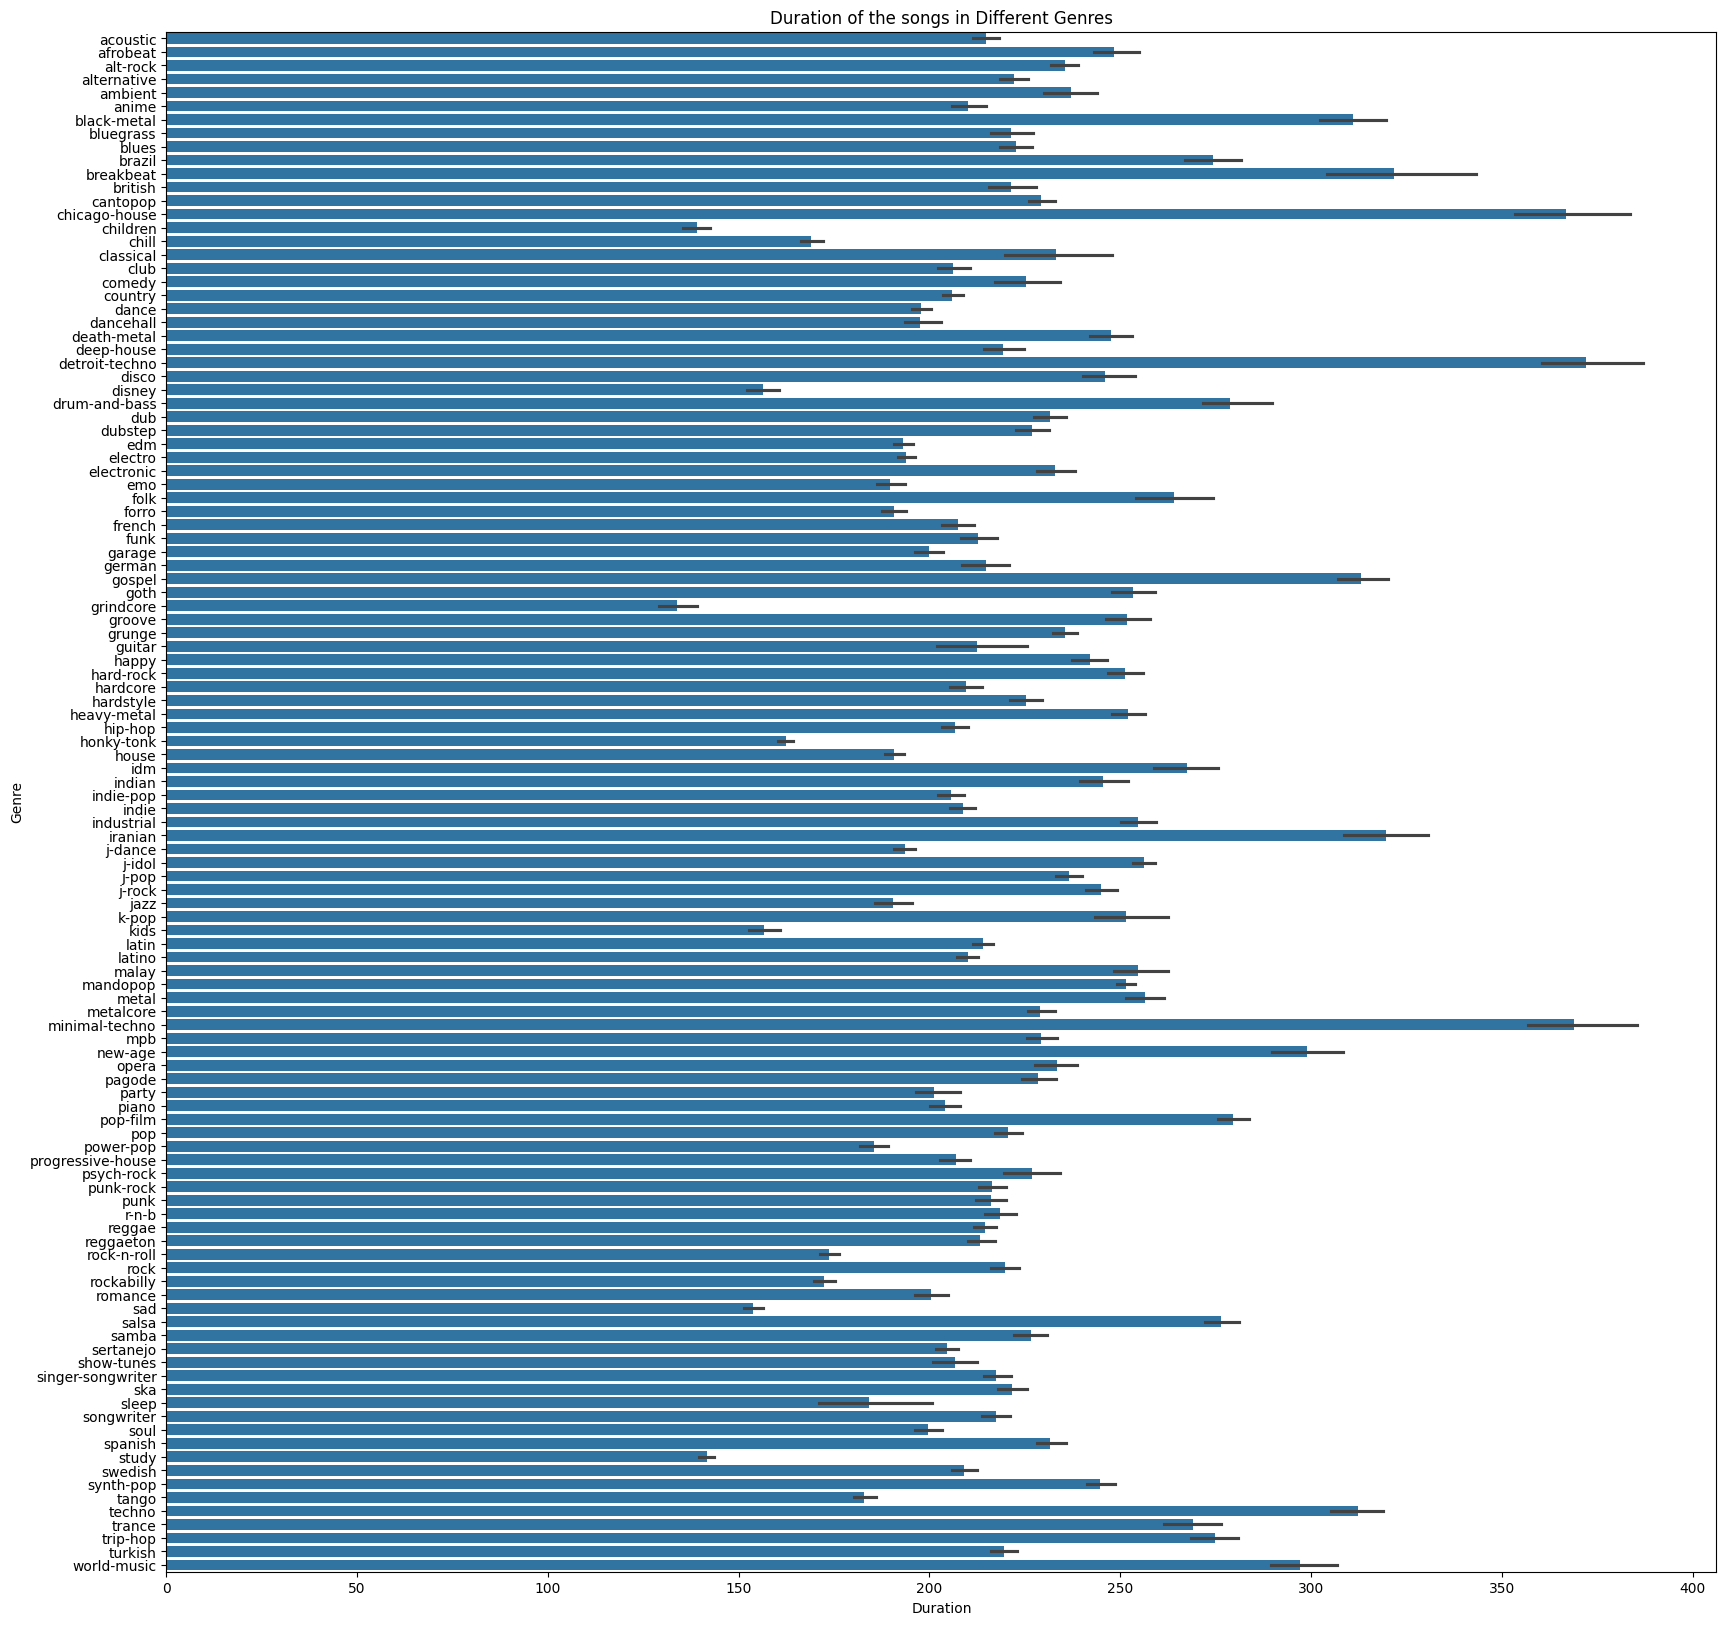

In [21]:
plt.figure(figsize=(20,20))
plt.title("Duration of the songs in Different Genres")
sns.color_palette("rocket", as_cmap=True)
sns.barplot(y='track_genre', x='duration', data=df)
plt.xlabel("Duration")
plt.ylabel("Genre")

[Text(0.5, 1.0, 'Most 5 popular genres')]

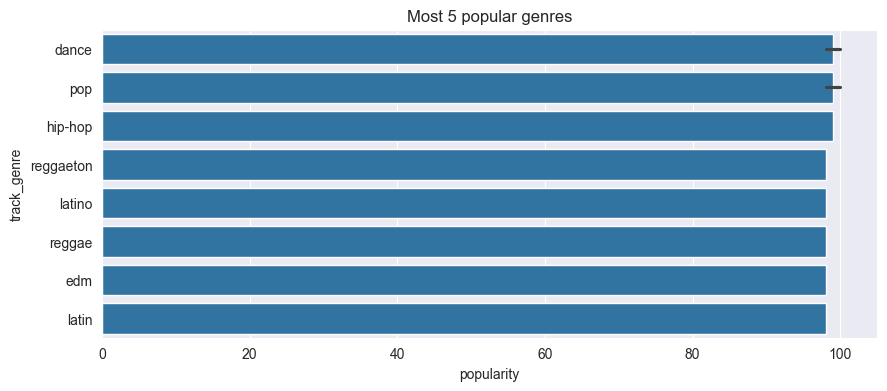

In [22]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize=(10,4))
famous=df.sort_values('popularity',ascending=False).head(10)
sns.barplot(y='track_genre', x='popularity', data=famous).set(title="Most 5 popular genres")

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

X=df[['artists','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','duration','track_genre']]
y=df['popularity']

model = LabelEncoder()

df['artists']= model.fit_transform(df['artists'])
df['track_genre']= model.fit_transform(df['track_genre'])

scaler = StandardScaler()
X = scaler.fit_transform(X)
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# decision tree
dtr = SVR()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

c:\Users\31syl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\31syl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\31syl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\31syl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base

Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean squared error: 391.44178704065433
R-squared: 0.2156064559854447


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


X= df[['artists','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','duration','track_genre']]
y= df['popularity']

encode = LabelEncoder()

df['artists']= encode.fit_transform(df['artists'])
df['track_genre']= encode.fit_transform(df['track_genre'])

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#from here
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


#to here

best_algo=['name',0]

models= [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(),SVC()]

for model in models:
    model.fit(x_train,y_train)
    train_pred=model.predict(x_train)
    test_pred = model.predict(x_test)

    print("***TRAIN***")
    print(f'Accuracy score: {accuracy_score(y_train,train_pred)}')
    print(f'Precision score: {precision_score(y_train,train_pred)}')
    print(f'Recall score: {recall_score(y_train,train_pred)}')
    print(f'F1 score: {f1_score(y_train,train_pred)}')

    print("***TEST***")
    print(f'Accuracy score: {accuracy_score(y_test,test_pred)}')
    print(f'Precision score: {precision_score(y_test,test_pred)}')
    print(f'Recall score: {recall_score(y_test,test_pred)}')
    print(f'F1 score: {f1_score(y_test,test_pred)}')

    print("\n\n")

    if best_algo[1]<=f1_score(y_test,test_pred):
        best_algo=[type(model).__name__,f1_score(y_test,test_pred)]

print(best_algo)



c:\Users\31syl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


***TRAIN***
Accuracy score: 0.1415585697211592


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].